In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
%matplotlib inline

## 1. Introduction¶

 Bla bla bla (à faire plutard)

## 2. Loading Dataset
### 2.1.Train set 

In [2]:

# import train set
train_data=pd.read_csv("train.csv")
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### 2.2.Test set 

In [3]:
# import test set
test_data=pd.read_csv("test.csv")
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


## 3. Data type and missing values
### 3.1.Data Type

In [4]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 3.2.Missing values

<AxesSubplot:>

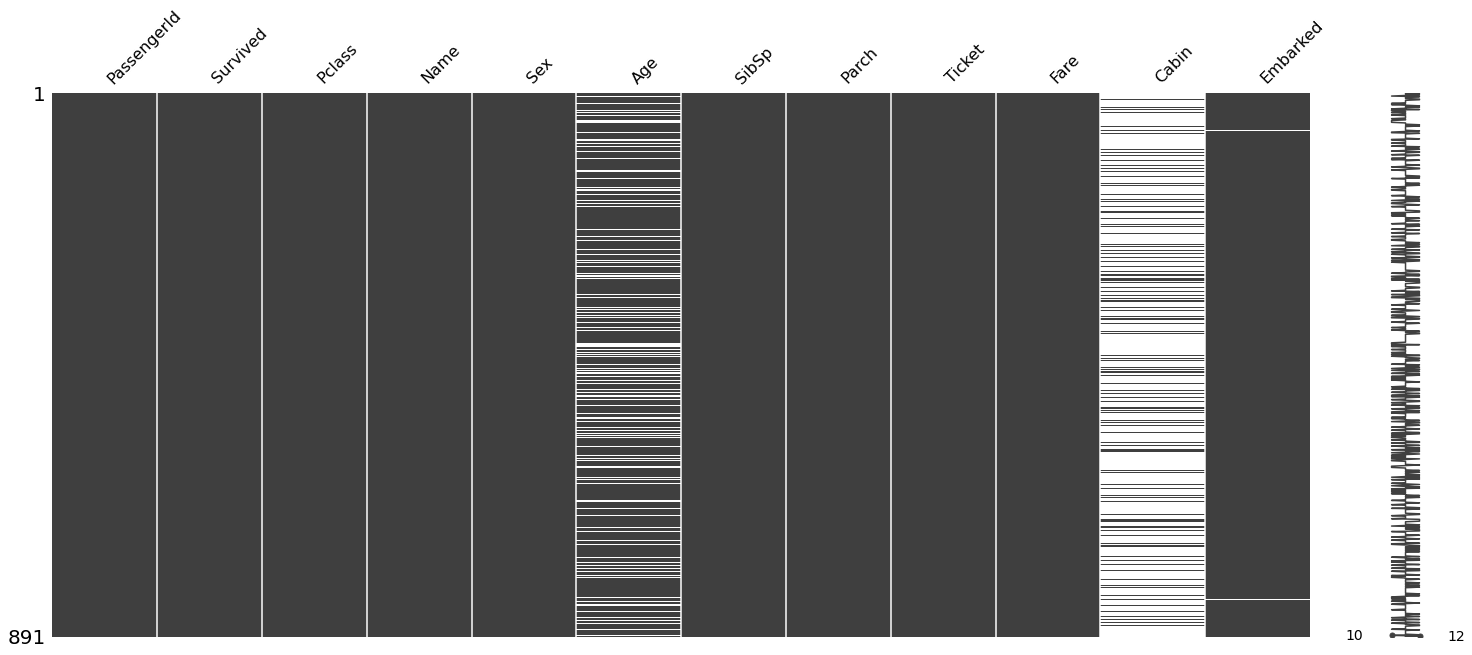

In [5]:
### Missing values in train set
msno.matrix(train_data)

### 3.3.Missing values proportion for train set

In [6]:
train_data_missing= train_data.isna()
train_num_missing = train_data_missing.sum()
train_num_missing/len(train_num_missing)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            14.750000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          57.250000
Embarked        0.166667
dtype: float64

### 3.4.Missing values proportion for test set

In [7]:
test_data_missing= test_data.isna()
test_num_missing = test_data_missing.sum()
test_num_missing/len(test_num_missing)

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             7.818182
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.090909
Cabin          29.727273
Embarked        0.000000
dtype: float64

# 4.Data visualization
### 4.1.Data set building
Data visualisation should be done on the entire data set (train and test sets). Then, we have to concatenate train_data and test_data

In [8]:
all_data = [train_data, test_data]
df = pd.concat(all_data)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 4.2 Survived

In [9]:
df.groupby(by=['Sex', 'Survived']).size()

Sex     Survived
female  0.0          81
        1.0         233
male    0.0         468
        1.0         109
dtype: int64

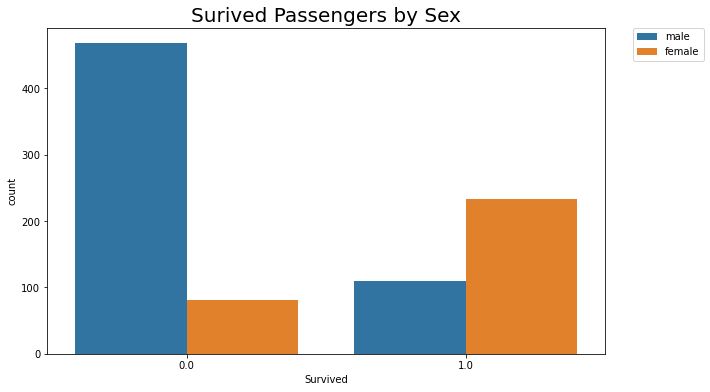

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x = "Survived", hue = "Sex", data = df).set_title('Surived Passengers by Sex', fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### 4.3 Pclass plot

In [11]:
df.groupby(by=['Pclass', 'Survived']).size()

Pclass  Survived
1       0.0          80
        1.0         136
2       0.0          97
        1.0          87
3       0.0         372
        1.0         119
dtype: int64

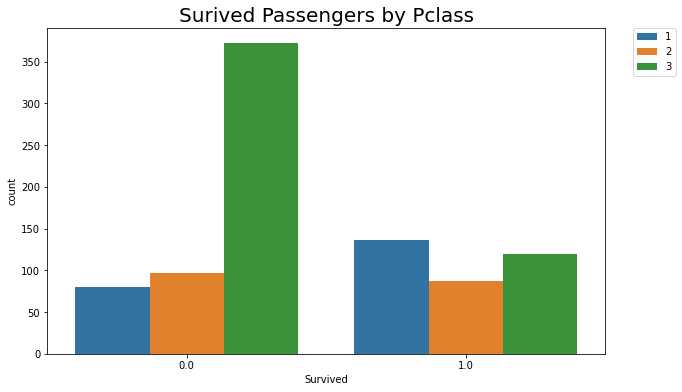

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x = "Survived", hue = "Pclass", data = df).set_title('Surived Passengers by Pclass', fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### 4.4 Siblings Plot

In [13]:
df.groupby(by=['SibSp', 'Survived']).size()

SibSp  Survived
0      0.0         398
       1.0         210
1      0.0          97
       1.0         112
2      0.0          15
       1.0          13
3      0.0          12
       1.0           4
4      0.0          15
       1.0           3
5      0.0           5
8      0.0           7
dtype: int64

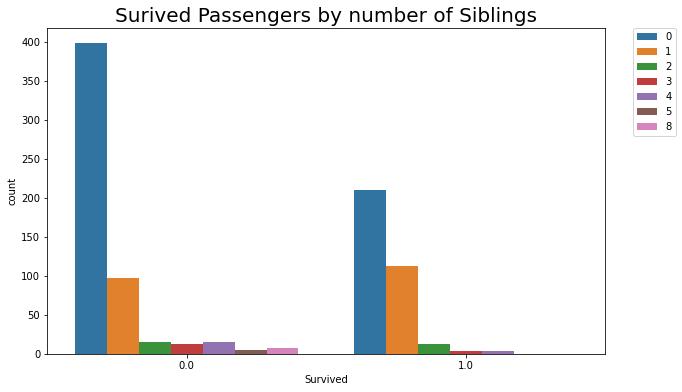

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x = "Survived", hue = "SibSp", data = df).set_title('Surived Passengers by number of Siblings', 
                                                                  fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [15]:
df.groupby(by=['Embarked', 'Survived']).size()

Embarked  Survived
C         0.0          75
          1.0          93
Q         0.0          47
          1.0          30
S         0.0         427
          1.0         217
dtype: int64

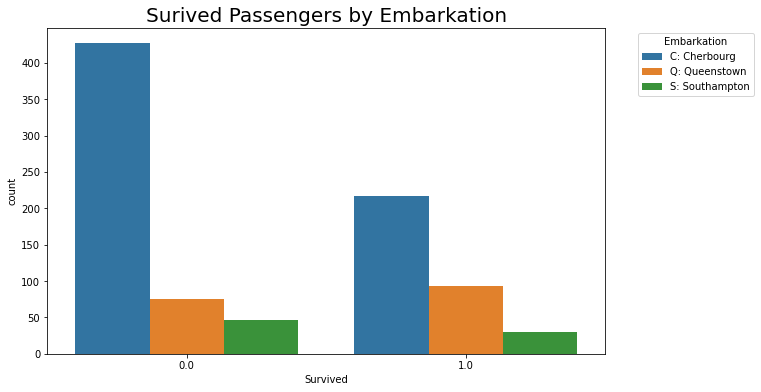

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x = "Survived", hue = "Embarked", 
              data = df).set_title('Surived Passengers by Embarkation', fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), title='Embarkation', loc='upper left',
           labels=['C: Cherbourg', 'Q: Queenstown', 'S: Southampton'])